<a href="https://colab.research.google.com/github/nandhishtr/jupyter/blob/master/Exploratory_Data_Analysis_on_Haberman_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis on Haberman Dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
file = files.upload()

Saving haberman.csv to haberman.csv


In [2]:
haberman_df = pd.read_csv('haberman.csv')
haberman_df.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

###Variables
* age - Patient's age at the time of operation  
* year - Year of Operation (19')  
* nodes - Number of positive axillary nodes detected  
* status - Survival status  
  * 1 - Patient has survived  5  years or longer  
  * 2 - Patient died within 5 years


In [3]:
haberman_df.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [81]:
print(haberman_df.shape)
print(haberman_df['status'].value_counts())
print(haberman_df.info())

(306, 4)
1    225
2     81
Name: status, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     306 non-null    int64
 1   year    306 non-null    int64
 2   nodes   306 non-null    int64
 3   status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB
None


*Observations:*
* There are **306** data points
* All the variables are of type int64 and they do not have any missing value.
* There are **3** features - age, year, nodes
* Class Label **status** has two classes **1** and **2**
  * There are 225 data points which belong to class **1** i.e 225 patients out of 306 survived  for 5 years or more
  * There are 81 data points which belong to class **2** i.e 81 patients out of 306 survived  for less than 5 years  
  As the number of data points ratio between **1** and **2** is almost 3:1, it is an imbalanced dataset
  

### Objective:
  Given the data of a patient who has undergone surgery for breast cancer, classify the patient as belonging to one of the two classes **1** and **2** with following given features:
  * patient's age at the time of operation
  * year of operation
  * number of positive axillary nodes detected

In [5]:
print("Ages of patient who has undergone surgery for breast cancer: ")
print("Minimum age: {1}, Maximum age: {0}".format(haberman_df['age'].max(), haberman_df['age'].min()))
print("Number of positive axillary nodes detected: ")
print("Minimum nodes: {1}, Maximum nodes: {0}".format(haberman_df['nodes'].max(), haberman_df['nodes'].min()))

Ages of patient who has undergone surgery for breast cancer: 
Minimum age: 30, Maximum age: 83
Number of positive axillary nodes detected: 
Minimum nodes: 0, Maximum nodes: 52


## Pair Plots

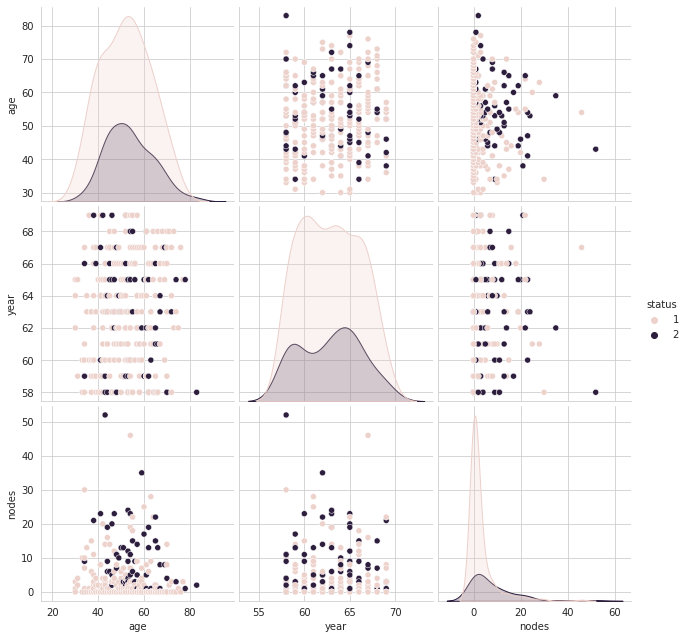

In [6]:
sns.set_style('whitegrid')
sns.pairplot(haberman_df, hue = 'status', height = 3);
plt.show()

*Observations:*
* The data is not linearly separable in any of the plots.
* Only plot of 'nodes' vs 'age' can slightly distinguish between the two classes. We can reject the other plots.

## 2-D Scatter Plot

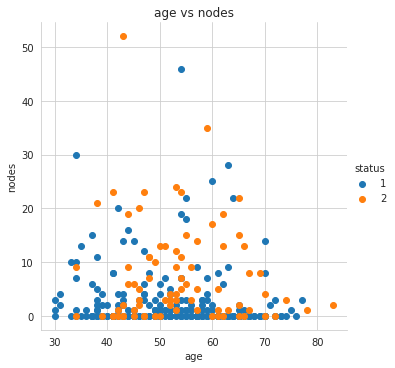

In [7]:
sns.set_style('whitegrid')
sns.FacetGrid(haberman_df, hue = 'status', height = 5)\
.map(plt.scatter, 'age', 'nodes').add_legend()
plt.title('age vs nodes')
plt.show()

*Observations:*
* All patient who were diagnosed with breast cancer are aged between 30 and 83.
* Number of positive axillary nodes detected lies between 0 and 52.
* Most of the patients have less than 30 positive axillary nodes.

## 1-D Scatter plot

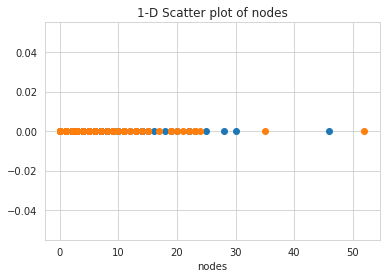

In [8]:
haberman_long_survived = haberman_df[haberman_df['status'] == 1]
haberman_short_survived = haberman_df[haberman_df['status'] == 2]
plt.plot(haberman_long_survived['nodes'], np.zeros_like(haberman_long_survived['nodes']), 'o')
plt.plot(haberman_short_survived['nodes'], np.zeros_like(haberman_short_survived['nodes']), 'o')
plt.title('1-D Scatter plot of nodes')
plt.xlabel('nodes')
plt.show()

*Observations:*
* Most of the data points of each class overlap. No observations can be drawn from this plot.

## PDF

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

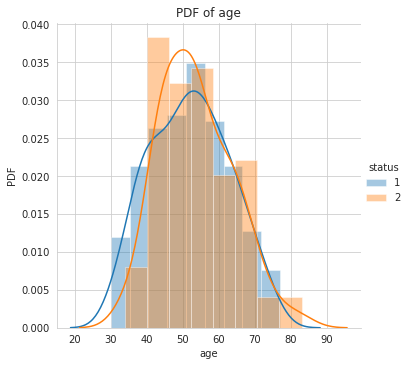

In [9]:
sns.FacetGrid(haberman_df, hue  = 'status', height = 5)\
.map(sns.distplot, 'age').add_legend()
plt.title('PDF of age')
plt.ylabel("PDF")
plt.plot()

*Observations:*
* Histograms between 35 to 75 overlap each other most of the time.PDF of long survived and short survived is similar in this plot using 'age'. No observations can be drawn from this plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

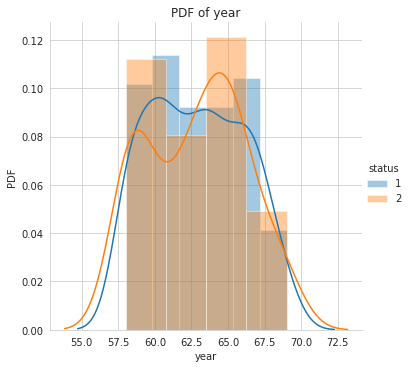

In [10]:
sns.FacetGrid(haberman_df, hue  = 'status', height = 5)\
.map(sns.distplot, 'year').add_legend()
plt.title('PDF of year')
plt.ylabel("PDF")
plt.plot()

*Observations:*
* Histograms overlap each other most of the time.PDF of long survived and short survived is similar in this plot using 'year'. No observations can be drawn from this plot.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[]

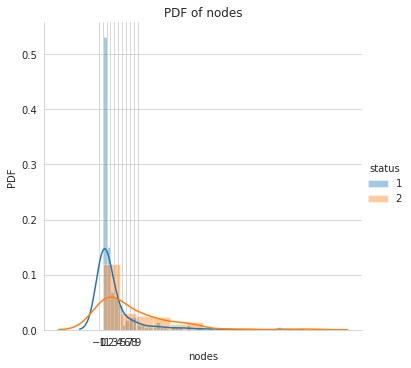

In [11]:
sns.FacetGrid(haberman_df, hue  = 'status', height = 5)\
.map(sns.distplot, 'nodes').add_legend()
plt.title('PDF of nodes')
plt.xticks(range(-1, 10))
plt.ylabel("PDF")
plt.plot()

*Observations:*
* **nodes** is the best feature of the 3, for univariate analysis. I select **nodes** for further univariate analysis.
* We can observe from here that lesser the number of axillary nodes, higher the chances of long survival
* Patients with 1 axillary node has higher chance of long survival with a probability over 0.5
* We can develop a simple if-else model for classification.  
if nodes<= 3:  
&nbsp;&nbsp;&nbsp;&nbsp;status = 1 (long survival)  
else:  
&nbsp;&nbsp;&nbsp;&nbsp;status = 2 (short survival)  

## CDF

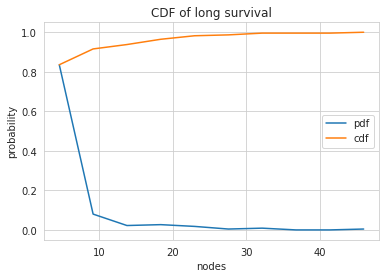

In [75]:
counts, bin_edges = np.histogram(haberman_long_survived['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label = 'pdf')
plt.plot(bin_edges[1:], cdf, label = 'cdf')
plt.title('CDF of long survival')
plt.ylabel('probability')
plt.xlabel('nodes')
plt.legend()
plt.show()

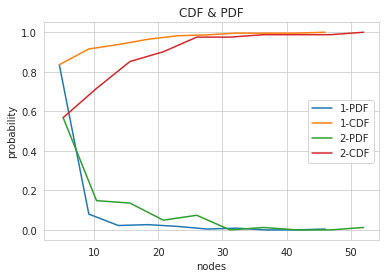

In [73]:
counts, bin_edges = np.histogram(haberman_long_survived['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,label = '1-PDF')
plt.plot(bin_edges[1:], cdf,label = '1-CDF')

counts, bin_edges = np.histogram(haberman_short_survived['nodes'],bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf,label = '2-PDF')
plt.plot(bin_edges[1:], cdf,label = '2-CDF')
plt.ylabel('probability')
plt.xlabel('nodes')
plt.title("CDF & PDF")
plt.legend()
plt.show()

*Observations:*
* There is 84% chance of long survival if number of nodes are less than or equal to 5.
* If there are more than 38 nodes, there is 100% chance of short survival

## Mean

In [35]:
print("Mean - Long Survival")
print("Without outlier    : ",np.mean(haberman_long_survived['nodes']))
print("With outlier       : ",np.mean(np.append(haberman_long_survived['nodes'], 70)))
print("\nMean - Short Survival")
print("Without outlier    : ",np.mean(haberman_short_survived['nodes']))
print("With outlier       : ",np.mean(np.append(haberman_short_survived['nodes'], 70)))

Mean - Long Survival
Without outlier    :  2.7911111111111113
With outlier       :  3.088495575221239

Mean - Short Survival
Without outlier    :  7.45679012345679
With outlier       :  8.21951219512195


*Observations:*
* On an average, a long survived patient has 2.7911 number of positive axillary nodes detected.
* On an average, a short survived patient has 7.4567 number of positive axillary nodes detected.
* Adding an outlier to long survived patients dataset did not affect the mean by large amount
* Outlier affects short survival dataset mean by a significant amount



## Standard Deviation

In [36]:
print("Standard Deviation - Long Survival")
print("Without outlier    : ",np.std(haberman_long_survived['nodes']))
print("With outlier       : ",np.std(np.append(haberman_long_survived['nodes'], 70)))
print("\nStandard Deviation - Short Survival")
print("Without outlier    : ",np.std(haberman_short_survived['nodes']))
print("With outlier       : ",np.std(np.append(haberman_short_survived['nodes'], 70)))

Standard Deviation - Long Survival
Without outlier    :  5.857258449412131
With outlier       :  7.352150395348365

Standard Deviation - Short Survival
Without outlier    :  9.128776076761632
With outlier       :  11.377153390643967


*Observations:*
* Spread of long survival(5.8572) is less compared to spread of short survival(9.1287)
* An outlier affects the standard deviation of both classes by a significant amount

## Median

In [37]:
print("Median - Long Survival")
print("Without outlier    : ",np.median(haberman_long_survived['nodes']))
print("With outlier       : ",np.median(np.append(haberman_long_survived['nodes'], 70)))
print("\nMedian - Short Survival")
print("Without outlier    : ",np.median(haberman_short_survived['nodes']))
print("With outlier       : ",np.median(np.append(haberman_short_survived['nodes'], 70)))

Median - Long Survival
Without outlier    :  0.0
With outlier       :  0.0

Median - Short Survival
Without outlier    :  4.0
With outlier       :  4.0


## Quantiles, 90th Percentile and Median Absolute Deviation

In [44]:
print("Quantiles")
print(np.percentile(haberman_long_survived['nodes'], np.arange(0,100,25)))
print(np.percentile(haberman_short_survived['nodes'], np.arange(0,100,25)))

print("\n90th Percentile")
print(np.percentile(haberman_long_survived['nodes'], 90))
print(np.percentile(haberman_short_survived['nodes'], 90))

print("\nMedian Absolute Deviation")
from statsmodels import robust
print(robust.mad(haberman_long_survived['nodes']))
print(robust.mad(haberman_short_survived['nodes']))

Quantiles
[0. 0. 0. 3.]
[ 0.  1.  4. 11.]

90th Percentile
8.0
20.0

Median Absolute Deviation
0.0
5.930408874022408


*Observations:*
* 50% patients who are long survived have 0 positive axillary nodes.
* 75% patients who are long survived have less than or equal to 3 nodes, only 25% patients who long survived have more than 3 nodes
* 50% patients who short survived have less than or equal to 4 axillary nodes.
* 75% patients who short survived have up to 11 axillary nodes, only 25% patients who short survived have more than 11 nodes
* At 90th percentile, long survived has 8 nodes  while short survived has  20 nodes.  
Less the numbers of nodes, higher the chances  of long survival.

## Box Plot

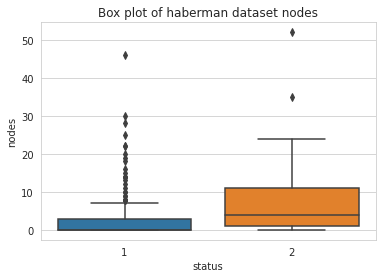

In [71]:
sns.boxplot(x = 'status', y = 'nodes', data = haberman_df)
plt.title("Box plot of haberman dataset nodes")
plt.show()

*Observations:*
* Long survival class has a lot of outliers
* 25th and 50th percentile of long survival are same at 0 nodes
* Threshold for long survival is 0 to  7
* Threshold for short survival is 0 to 24
* 50% of short survival nodes lie in range of 75% of long survival nodes
* Therefore, if a short survival node lies in range of 0-3 there is 50% chance of error

## Violin Plot

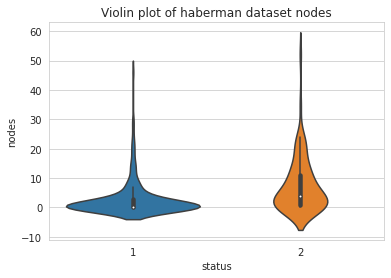

In [72]:
sns.violinplot(x = 'status', y = 'nodes', data = haberman_df, height = 8)
plt.title("Violin plot of haberman dataset nodes")
plt.show()

*Observations:*
* For long survival, density is more at 0 nodes
* Most values lie between 0-7  for long survival
* For short survival, density is more at 3 nodes
* Most values  lie  between 0-24 for short survival

## Contour Plot


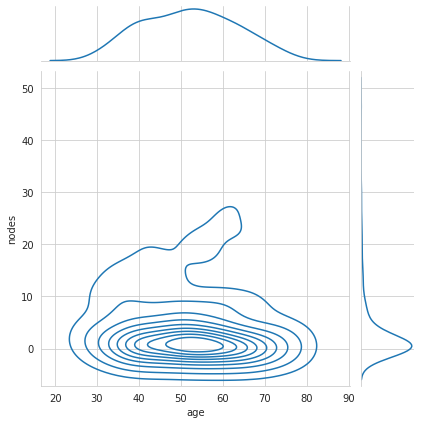

In [64]:
sns.jointplot(x = 'age', y= 'nodes', data = haberman_long_survived, kind='kde')
plt.show()

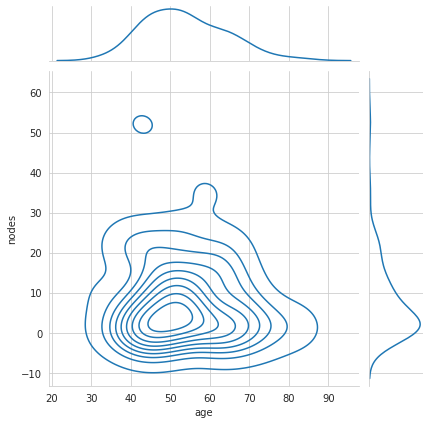

In [68]:
sns.jointplot(x = 'age', y= 'nodes', data = haberman_short_survived, kind='kde')
plt.show()

*Observations:*
* For long survival, maximum density lies at age range of 47 to 60 and axillary nodes of 0 to 3
* For short survival, maximum density lies at age range of 44 to 55 and axillary nodes of 1 to 7

## Conclusion
* Patient's age and year of operation are not deciding factor of their long survival.
* If the number of nodes  detected is 0, there is 86% chance of long survival.
* There is 84% chance of long survival if number of nodes are less than or equal to 5.
* All patient who were diagnosed with breast cancer are aged between 30 and 83.
* Less the numbers of nodes, higher the chances  of long survival.
* If there are more than 38 nodes, there is 100% chance of short survival
* The objective of classifying the patient as belonging to one of the classes based  on the given features is a difficult task as the data overlapped most of the time. There is a high chance of misclassification.